# **Classificação de Estrelas, Galáxias e Quasares. Sloan Digital Sky Survey DR17**
---

Amanda Caroline de Oliveira Pires - 12559090

Eduardo Maciel de Matos - 12563821

Giovanna Garrefa Silveira - 13835983

João Otávio da Silva - 12563748


## **Descrição do dataset**
Dataset: [Stellar Classification Dataset - SDSS17](https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17)

O dataset é composto por 100.000 observações do espaço, retiradas do Sloan Digital Sky Survey DR17. Cada observação se encaixa em uma classe (Estrela, Galáxia ou Quasar).

Telescópio SDSS
![image.png]( 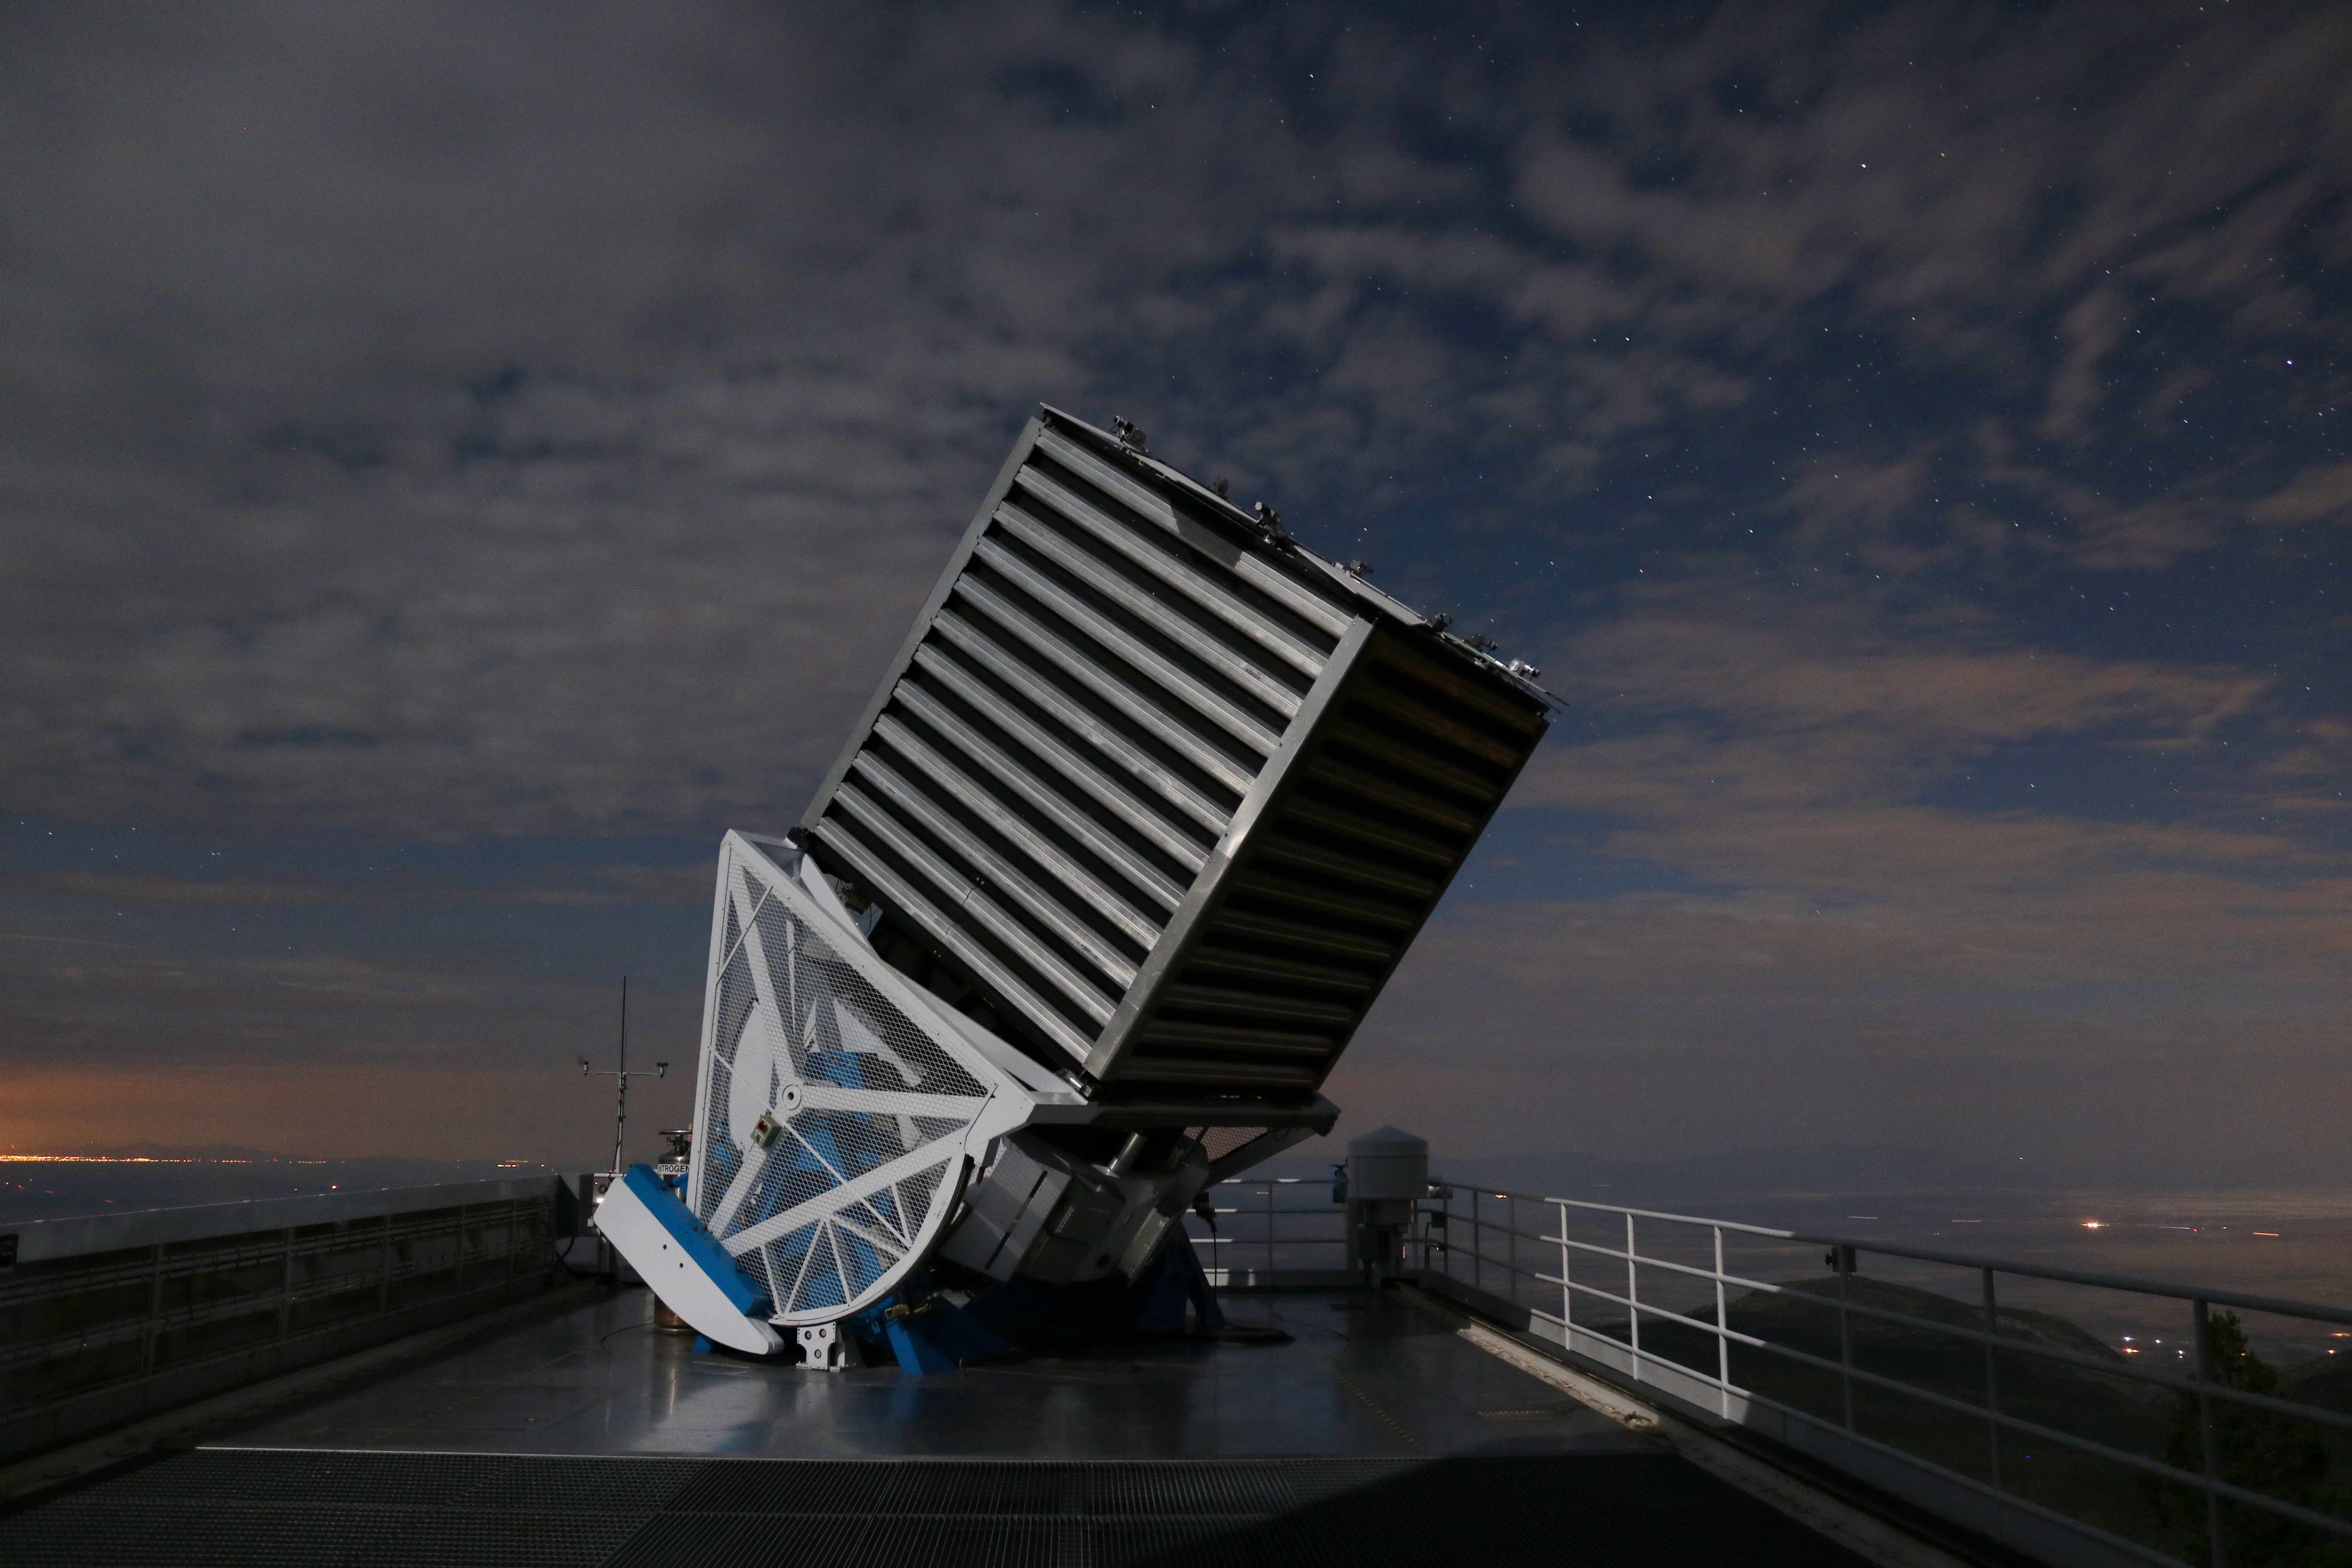)

### Galáxia
Grande sistema, gravitacionalmente ligado, que consiste de estrelas, remanescentes de estrelas, um meio interestelar de gás e poeira e um componente apelidado de matéria escura.

![image.png]( 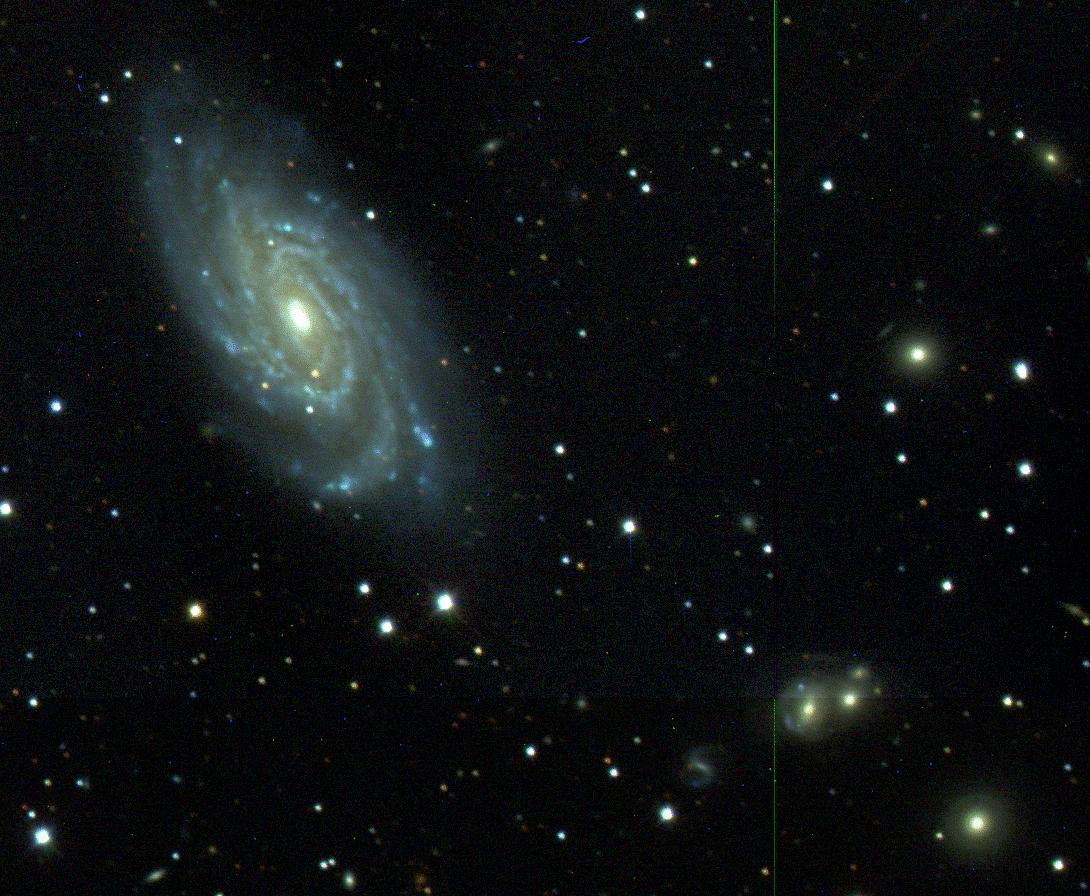)

### Estrela
Astro de plasma que possui luz própria, esférico e grande, mantido íntegro pela gravidade e pela pressão de radiação.

![image.png]( 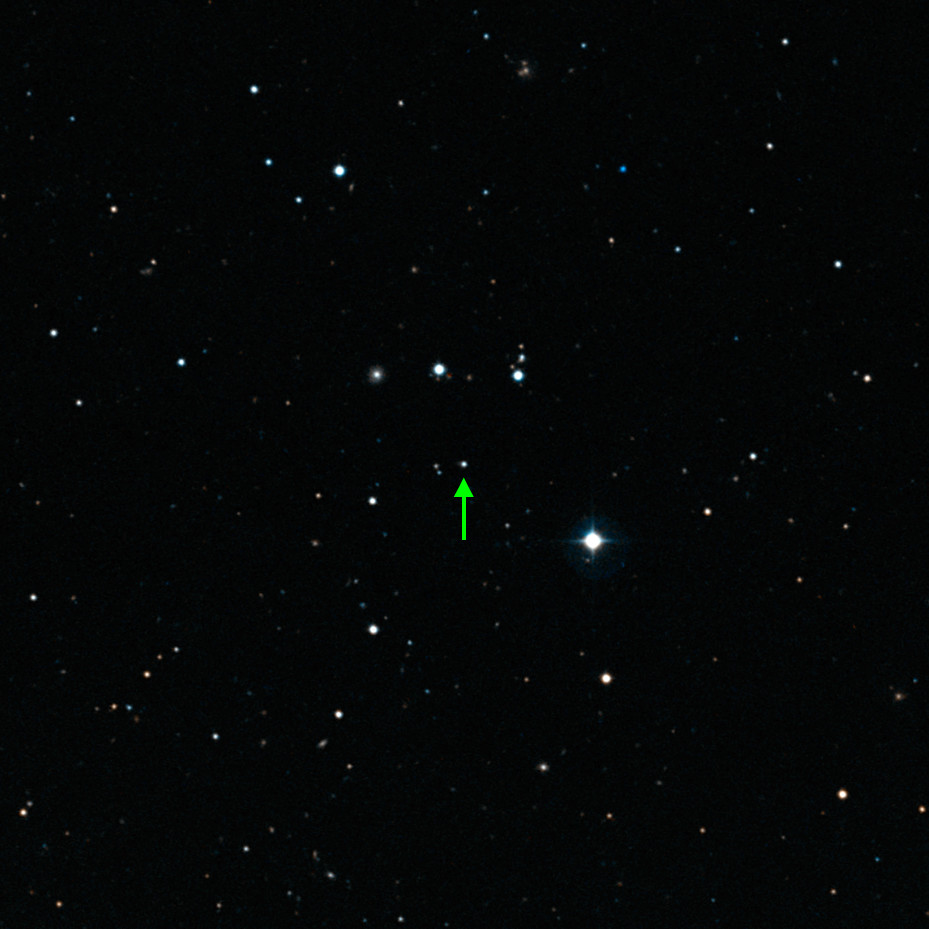)

### Quasar
Núcleo galáctico ativo, de tamanho maior que o de uma estrela, porém menor do que o tamanho mínimo para ser considerado uma galáxia.

![image.png]( 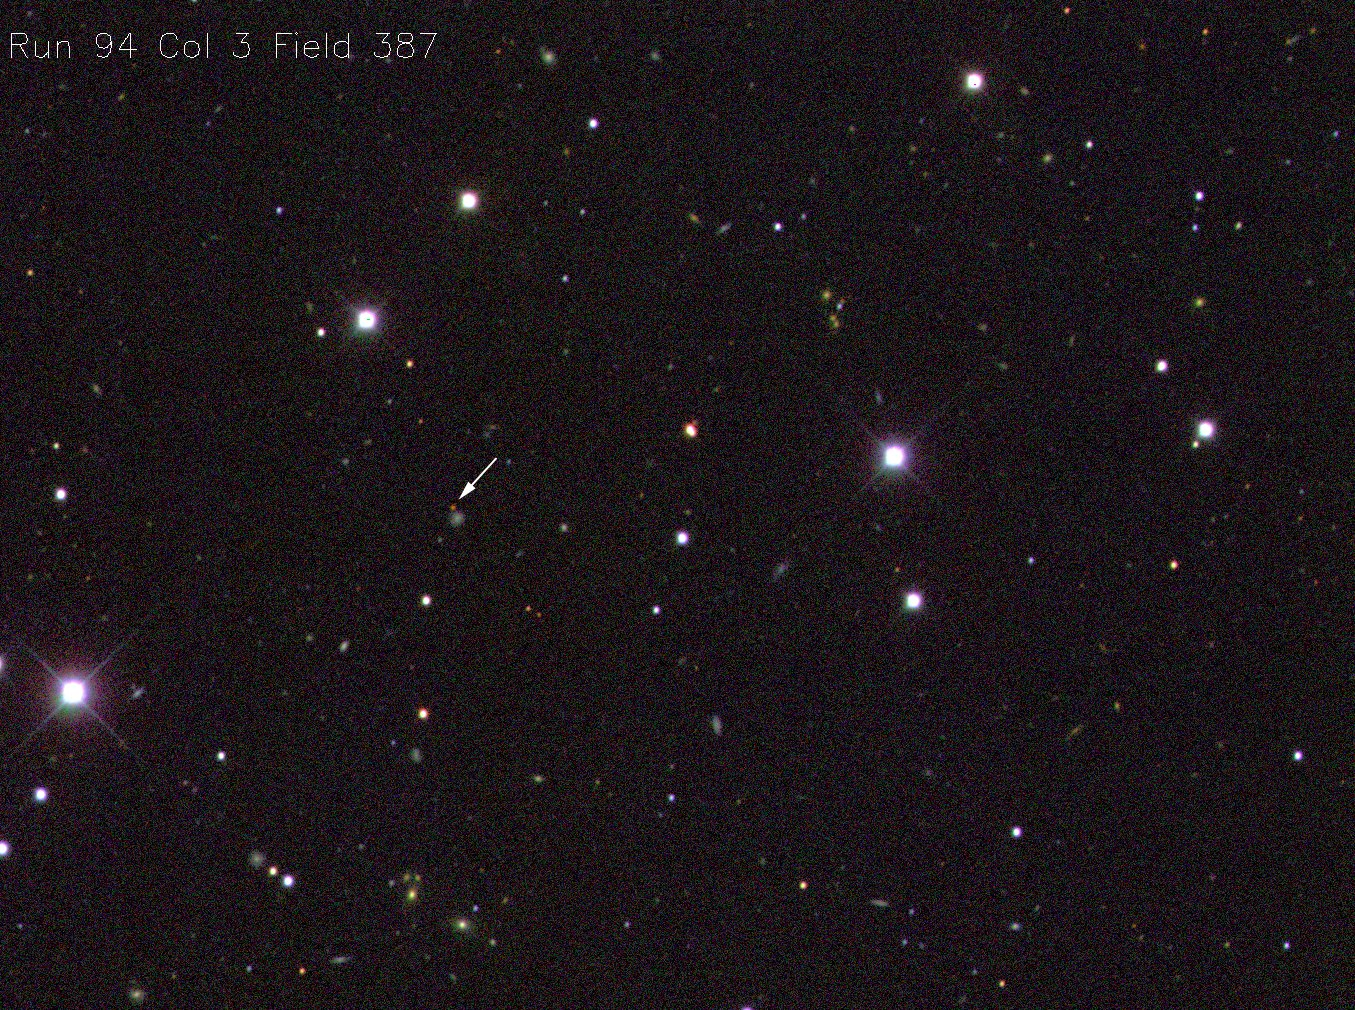)

Cada observação é descrita por 17 características, algumas delas são responsáveis por identificar coisas como: a própria observação, a coluna da câmera ou a fibra utilizada na captação, mais informações sobre esses atributos podem ser encontradas no link da fonte. Os outros atributos, de fato representam características das observações, sendo eles:

- alpha: ângulo de ascensão reta.
- delta: ângulo de declinação.
- u: filtro ultravioleta.
- g: filtro verde.
- r: filtro vermelho.
- i: filtro infravermelho próximo (ao espectro visível).
- z: filtro infravermelho.
- spec_obj_ID: identificador utilizado para os objetos espectroscópicos ópticos.
- redshift: desvio do vermelho com base no aumento de comprimento de onda.
- plate: placa utilizada no plano focal do telescópio.
- MJD: data juliana modificada que indica quando determinados dados do SDSS foram pegos.


## **Bibliotecas**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## **Leitura do dataset**

In [ ]:
from pandas import read_csv, DataFrame

# Lê os dados do arquvio csv.
data = read_csv('star_classification.csv')

## **Análise exploratória dos Dados**

In [ ]:
display(data)

obj_ID       alpha      delta         u         g         r  \
0      1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1      1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2      1.237661e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3      1.237663e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4      1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   
...             ...         ...        ...       ...       ...       ...   
99995  1.237679e+18   39.620709  -2.594074  22.16759  22.97586  21.90404   
99996  1.237679e+18   29.493819  19.798874  22.69118  22.38628  20.45003   
99997  1.237668e+18  224.587407  15.700707  21.16916  19.26997  18.20428   
99998  1.237661e+18  212.268621  46.660365  25.35039  21.63757  19.91386   
99999  1.237661e+18  196.896053  49.464643  22.62171  21.79745  20.60115   

              i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
0      19.16573  18.79371    3606       301        2        79  6.543777e+18   
1      21.16812  21.61427    4518       301        5       119  1.176014e+19   
2      19.34857  18.94827    3606       301        2       120  5.152200e+18   
3      20.50454  19.25010    4192       301        3       214  1.030107e+19   
4      15.97711  15.54461    8102       301        3       137  6.891865e+18   
...         ...       ...     ...       ...      ...       ...           ...   
99995  21.30548  20.73569    7778       301        2       581  1.055431e+19   
99996  19.75759  19.41526    7917       301        1       289  8.586351e+18   
99997  17.69034  17.35221    5314       301        4       308  3.112008e+18   
99998  19.07254  18.62482    3650       301        4       131  7.601080e+18   
99999  20.00959  19.28075    3650       301        4        60  8.343152e+18   

        class  redshift  plate    MJD  fiber_ID  
0      GALAXY  0.634794   5812  56354       171  
1      GALAXY  0.779136  10445  58158       427  
2      GALAXY  0.644195   4576  55592       299  
3      GALAXY  0.932346   9149  58039       775  
4      GALAXY  0.116123   6121  56187       842  
...       ...       ...    ...    ...       ...  
99995  GALAXY  0.000000   9374  57749       438  
99996  GALAXY  0.404895   7626  56934       866  
99997  GALAXY  0.143366   2764  54535        74  
99998  GALAXY  0.455040   6751  56368       470  
99999  GALAXY  0.542944   7410  57104       851  

[100000 rows x 18 columns]

In [ ]:
# Verificando informações do dataset.Todas as colunas (menos a classe) já estão em valores numéricos.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

Todas as colunas (menos a classe) já estão em valores numéricos.

In [ ]:
data.describe()

obj_ID          alpha          delta              u  \
count  1.000000e+05  100000.000000  100000.000000  100000.000000   
mean   1.237665e+18     177.629117      24.135305      21.980468   
std    8.438560e+12      96.502241      19.644665      31.769291   
min    1.237646e+18       0.005528     -18.785328   -9999.000000   
25%    1.237659e+18     127.518222       5.146771      20.352353   
50%    1.237663e+18     180.900700      23.645922      22.179135   
75%    1.237668e+18     233.895005      39.901550      23.687440   
max    1.237681e+18     359.999810      83.000519      32.781390   

                   g              r              i              z  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean       20.531387      19.645762      19.084854      18.668810   
std        31.750292       1.854760       1.757895      31.728152   
min     -9999.000000       9.822070       9.469903   -9999.000000   
25%        18.965230      18.135828      17.732285      17.460677   
50%        21.099835      20.125290      19.405145      19.004595   
75%        22.123767      21.044785      20.396495      19.921120   
max        31.602240      29.571860      32.141470      29.383740   

              run_ID  rerun_ID        cam_col       field_ID   spec_obj_ID  \
count  100000.000000  100000.0  100000.000000  100000.000000  1.000000e+05   
mean     4481.366060     301.0       3.511610     186.130520  5.783882e+18   
std      1964.764593       0.0       1.586912     149.011073  3.324016e+18   
min       109.000000     301.0       1.000000      11.000000  2.995191e+17   
25%      3187.000000     301.0       2.000000      82.000000  2.844138e+18   
50%      4188.000000     301.0       4.000000     146.000000  5.614883e+18   
75%      5326.000000     301.0       5.000000     241.000000  8.332144e+18   
max      8162.000000     301.0       6.000000     989.000000  1.412694e+19   

            redshift          plate            MJD       fiber_ID  
count  100000.000000  100000.000000  100000.000000  100000.000000  
mean        0.576661    5137.009660   55588.647500     449.312740  
std         0.730707    2952.303351    1808.484233     272.498404  
min        -0.009971     266.000000   51608.000000       1.000000  
25%         0.054517    2526.000000   54234.000000     221.000000  
50%         0.424173    4987.000000   55868.500000     433.000000  
75%         0.704154    7400.250000   56777.000000     645.000000  
max         7.011245   12547.000000   58932.000000    1000.000000

É possível notar que os valores estão bem dispersos, há colunas com ordens de grandeza bem diferentes, valores mínimos, máximos e desvios padrão discrepantes.

In [ ]:
# Verificando o número de valores únicos em cada coluna
data.nunique()

obj_ID          78053
alpha           99999
delta           99999
u               93748
g               92651
r               91901
i               92019
z               92007
run_ID            430
rerun_ID            1
cam_col             6
field_ID          856
spec_obj_ID    100000
class               3
redshift        99295
plate            6284
MJD              2180
fiber_ID         1000
dtype: int64

In [ ]:
# Verificando se há valores faltantes
data.isnull().sum()

# Removendo as linhas com Nan se houver
data = data.dropna()

### **Correlação**

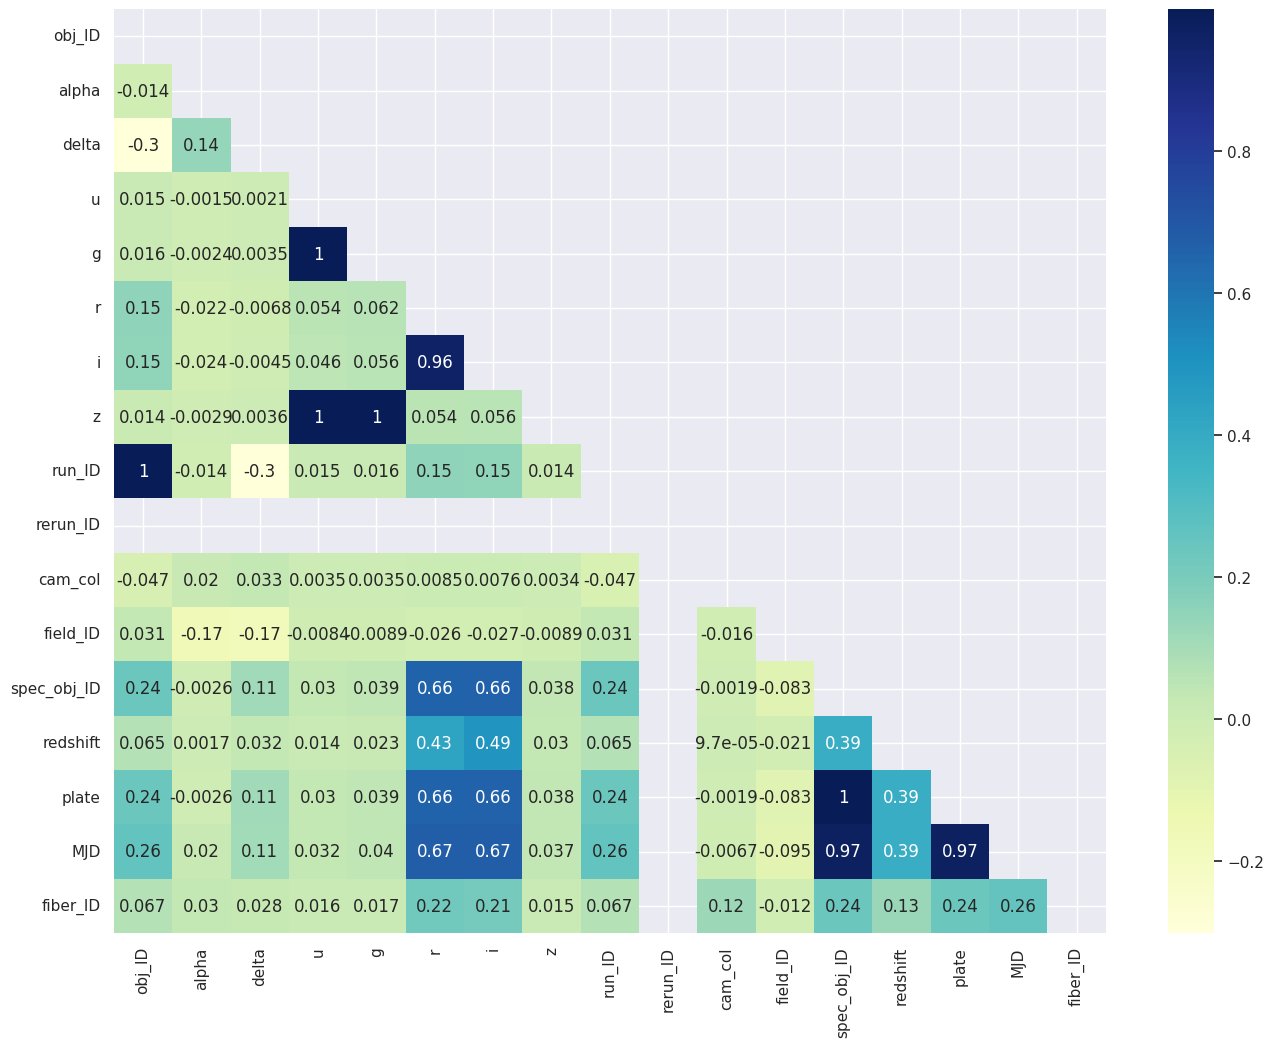

In [ ]:
# Imprime a matriz de correlação entre as características.
corr = data.drop(['class'], axis=1).corr()
sns.set(rc={'figure.figsize':(16,12)})
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, cmap='YlGnBu', mask=mask, annot=True)
plt.show()
sns.reset_defaults()

Nota-se que alguns atributos possuem uma alta correlação entre si. Alguns são colunas de identificação (run_id, spec_obj_ID, etc.), então pela própria semântica já iriamos remover do dataset. Outros atributos que apresentam grande correlação, são advindos das observações em si (filtros u, g, r, i, z, etc.). Nesse caso, com variáveis muito correlacionadas, o algoritmo Naive Bayes não será muito eficaz, em decorrência da suposição que o algoritmo faz de que as características são independentes. Porém, os outros três modelos utilizados, podem utilizar as informações, mesmo que com um certo grau de correlação (em testes prévios, a medida que removíamos variáveis correlacionadas, notamos aumento de performance no NB e diminuição (em alguns casos e relativamente pequena nos outros modelos). Portanto, optamos por utilizar duas variações do dataset:
- Uma removendo somente IDs, que pelo próprio contexto decidimos que não seriam importantes para o AM (KNN, MLP, Árvore de Decisão).
- Uma removendo os IDs e alguns atributos (como filtros) que possuem informações das observações, mas têm um grau de correlação relativamente elevado (Naive Bayes).

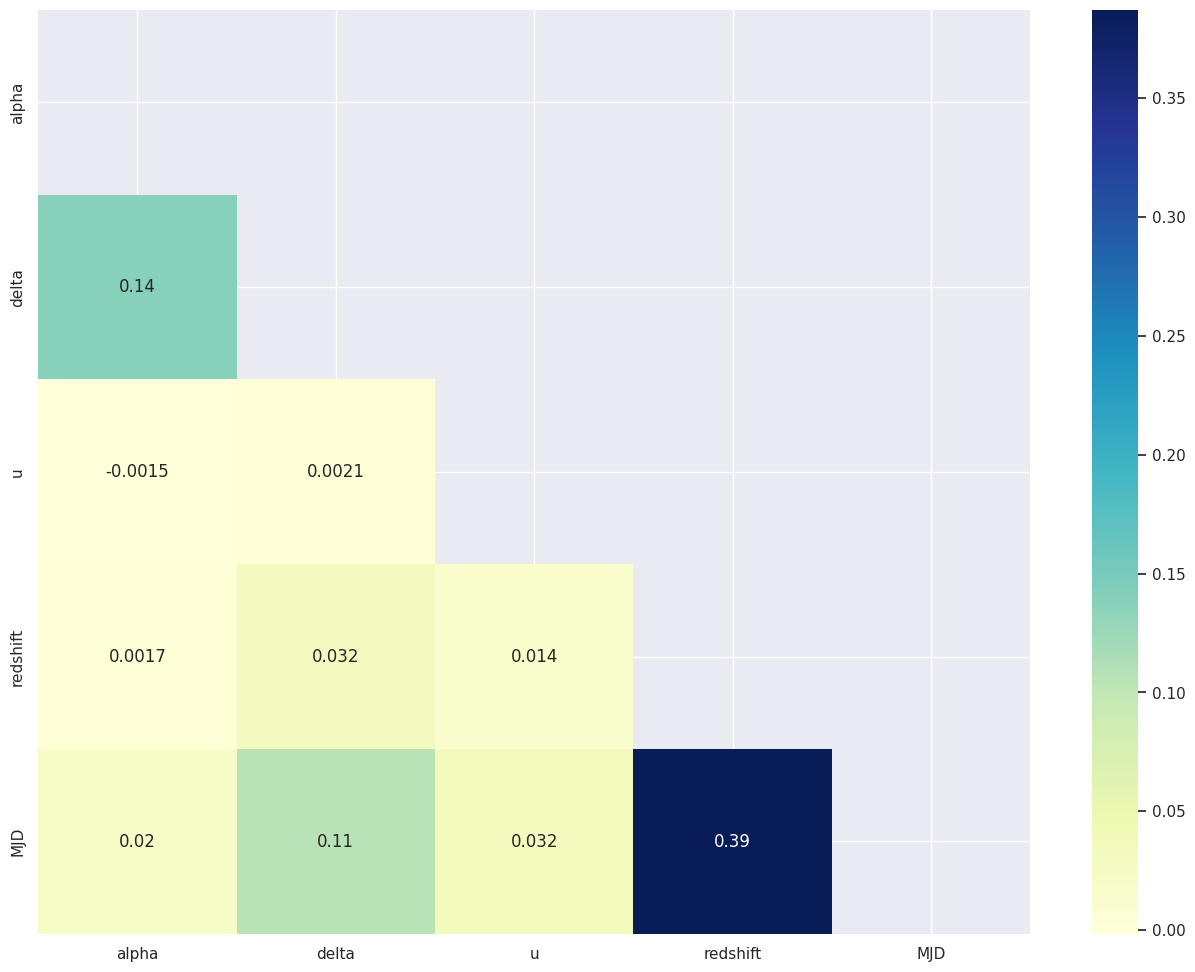

In [ ]:
# Imprime a matriz de correlação entre as características (removendo atributos com alta correlação).
corr = data.drop(['class', 'obj_ID','run_ID','cam_col','rerun_ID','field_ID','fiber_ID', 'z', 'r', 'g', 'plate', 'spec_obj_ID', 'i'], axis=1).corr()
sns.set(rc={'figure.figsize':(16,12)})
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, cmap='YlGnBu', mask=mask, annot=True)
plt.show()
sns.reset_defaults()

Após remover alguns atributos, a correlação máxima fica em torno de 0.35.

### **Distribuição das classes**

Verificando a distribuição das classes de objeto (galáxia, estrela ou quasar). Isso ajudará a entender se as classes estão balanceadas ou se há um desequilíbrio significativo.

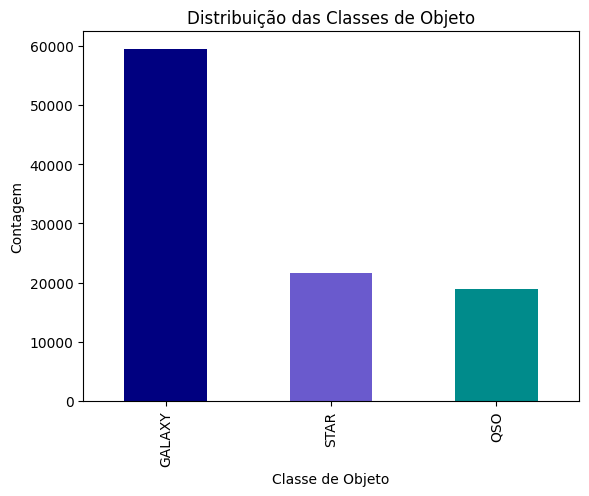

In [ ]:
# Número de ocorrências de cada classe
contagem = data['class'].value_counts()
cores = ['Navy', 'SlateBlue', 'DarkCyan']
contagem.plot(kind='bar', color = cores)
plt.xlabel('Classe de Objeto')
plt.ylabel('Contagem')
plt.title('Distribuição das Classes de Objeto')
plt.show()

É possível notar um desequilíbrio nas classes, aproximadamente 60% de galáxias, 20% de estrelas e 20% de quasares. Portanto, optamos por utilizar a AUC, que tende a ser mais robusta em casos de desbalanceamento. Porém, como o desequilíbrio não é extremo (como seria em um caso de detecção de fraudes), depois de treinar o modelo final (melhores hiperparâmetros na validação cruzada), também utilizamos a acurácia para medir o desempenho dos modelos.

### **Distribuição dos atributos**

Verificando o comportamento da distribuição dos atriubtos separados por classe.

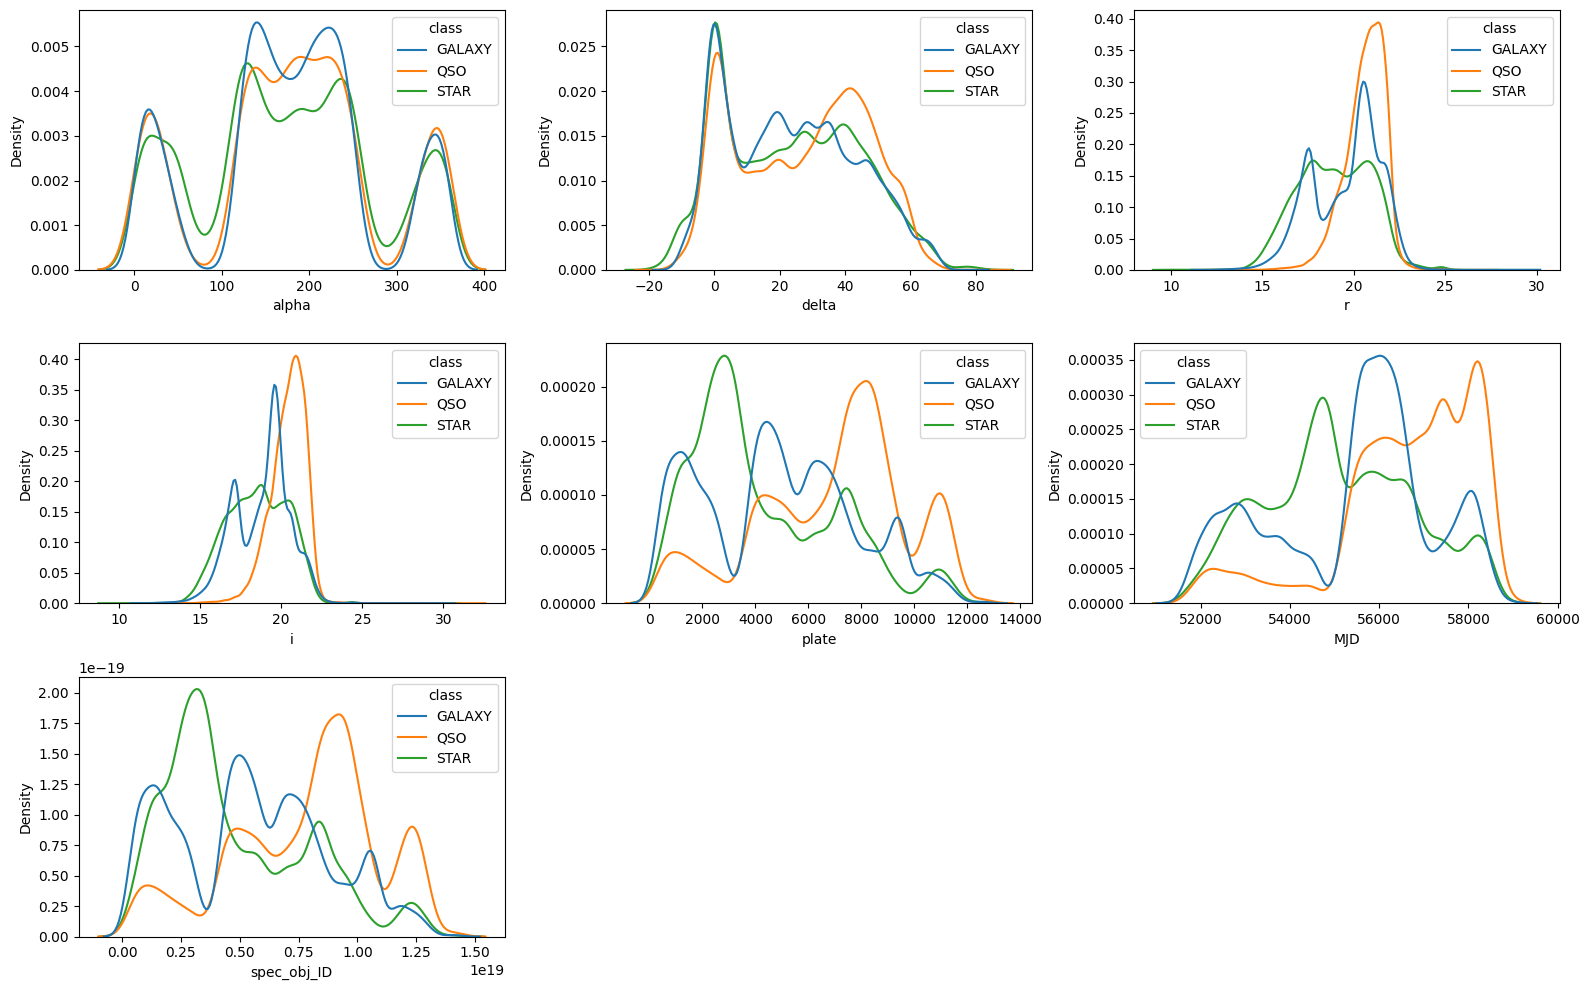

In [ ]:
# Classes que serão plotadas.
classes = ['alpha', 'delta', 'r', 'i', 'plate', 'MJD', 'spec_obj_ID']

# Prepara os subplots.
rows = 3
cols = 3
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(16, 10))

axes = axes.flatten()

for i, class_ in enumerate(classes):
    # Plot KDE.
    sns.kdeplot(x=class_, hue='class', ax=axes[i], data=data, common_norm=False, fill=False, alpha=1)

# Remove espaços não utilizados.
for i in range(len(classes), rows * cols):
    axes[i].set_axis_off()

plt.tight_layout()
plt.show()
sns.reset_defaults()

Para as características abaixo, a grande diferença nos valores dificulta a visualização da distribuição, portanto, aplicamos *log* nos valores, a fim de "suavizar" os valores e possibilitar uma melhor visualização.

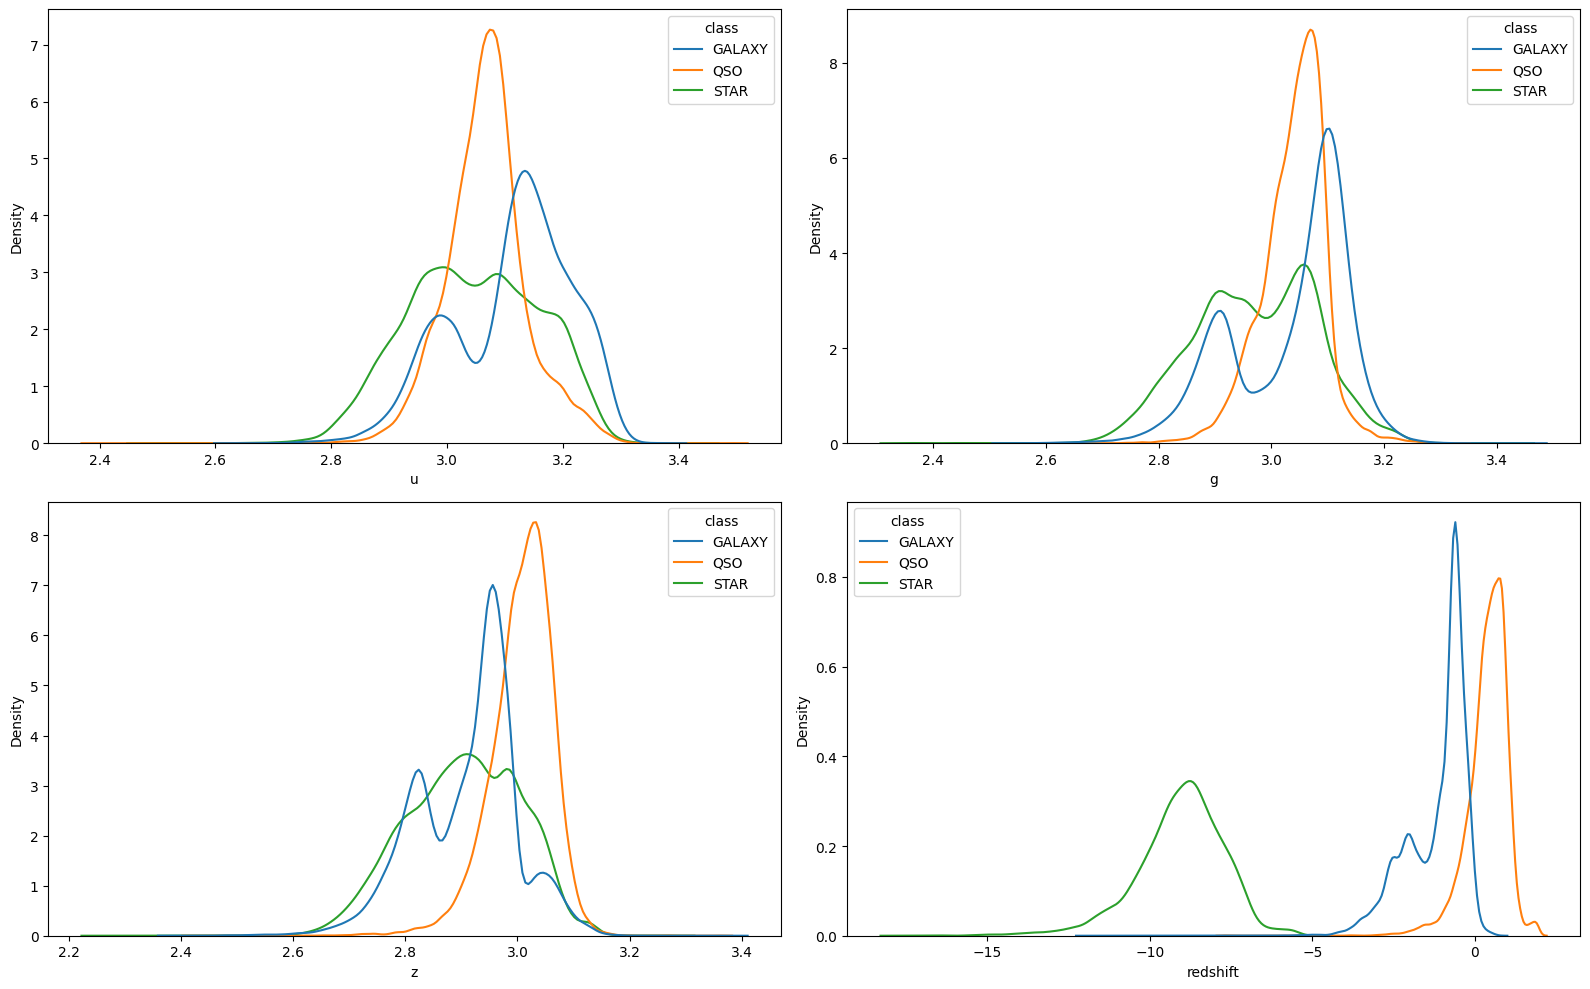

In [ ]:
# Classes que serão plotadas.
classes = ['u', 'g', 'z', 'redshift']

# Prepara os subplots.
rows = 2
cols = 2
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(16, 10))

axes = axes.flatten()

# Faz uma cópia do dataset, será utlizada aplicando log nas colunas de interesse.
data_ = data.copy()

for i, class_ in enumerate(classes):
    # Ignora o warning e aplica log na coluna.
    with np.errstate(divide='ignore', invalid='ignore'):
        data_[class_] = np.log(data_[class_])
    # Plot KDE.
    sns.kdeplot(x=class_, hue='class', ax=axes[i], data=data_, common_norm=False, fill=False, alpha=1)

# Remove subplots não utilizados.
for i in range(len(classes), rows * cols):
    axes[i].set_axis_off()

plt.tight_layout()
plt.show()
sns.reset_defaults()

Em alguns casos é notável que a distribuição do atributo é bem parecida para as três classes, porém não julgamos que seria interessante remover nenhuma coluna. Exemplo: para o atributo *alpha*, as linhas estão bem juntas, porém, entre os valores 150 e 250, a densidade da classe *STAR* é menor do que a das outras, essa característica pode ajudar o aprendizado do modelo, portanto optamos por manter esse atributo. Seguimos um raciocínio análogo para outros casos parecidos (fora os casos em que é bem notável a diferença entre as classes, ex: *reshift*). Também é possível notar um comportamento parecido para classes que têm alta correlação (já citado mais acima), por exemplo: *spec_obj_ID* e *plate*.

## **Pré-processamento**

In [ ]:
# Imports.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### **Padronização**

Como visto na seção de análise dos dados, os dados não estão muito "comportados". Portanto, utilizamos o StandardScaler para padronizar os dados. Para calcular o valor transformado, ele basicamente subtrai a média e divide pelo desvio padrão. Dessa forma, as variáveis passam a ter média igual a zero e desvio padrão igual um. O objetivo é fazer com que as características tenham uma escala compatível.

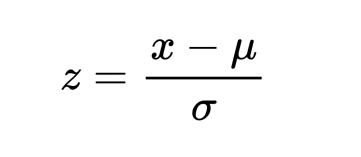

A seguir, fazemos a tranformação na base inteira, para mostrar o resultado (não será aplicado dessa forma no uso dos modelos).

In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(data.drop(['class'], axis=1))
df_scaled = pd.DataFrame(df_scaled, columns=data.drop(['class'], axis=1).columns)
df_scaled['class'] = data['class']

In [ ]:
df_scaled.describe()

obj_ID         alpha         delta             u             g  \
count  1.000000e+05  1.000000e+05  1.000000e+05  1.000000e+05  1.000000e+05   
mean   1.761978e-11 -3.970513e-16  1.173817e-16  2.279066e-17  2.815526e-17   
std    1.000005e+00  1.000005e+00  1.000005e+00  1.000005e+00  1.000005e+00   
min   -2.225380e+00 -1.840625e+00 -2.184860e+00 -3.154314e+02 -3.155745e+02   
25%   -6.589569e-01 -5.192744e-01 -9.666048e-01 -5.124836e-02 -4.932757e-02   
50%   -1.491578e-01  3.390180e-02 -2.491184e-02  6.253452e-03  1.790380e-02   
75%    4.299892e-01  5.830556e-01  8.025754e-01  5.373051e-02  5.015351e-02   
max    1.873497e+00  1.889817e+00  2.996514e+00  3.399816e-01  3.486868e-01   

                  r             i             z        run_ID  rerun_ID  \
count  1.000000e+05  1.000000e+05  1.000000e+05  1.000000e+05  100000.0   
mean   4.587974e-16 -2.325322e-15 -4.646949e-17 -1.426770e-16       0.0   
std    1.000005e+00  1.000005e+00  1.000005e+00  1.000005e+00       0.0   
min   -5.296504e+00 -5.469610e+00 -3.157360e+02 -2.225400e+00       0.0   
25%   -8.140905e-01 -7.694294e-01 -3.807782e-02 -6.587927e-01       0.0   
50%    2.585404e-01  1.822022e-01  1.058323e-02 -1.493143e-01       0.0   
75%    7.542917e-01  7.461467e-01  3.947018e-02  4.298928e-01       0.0   
max    5.351716e+00  7.427453e+00  3.377122e-01  1.873330e+00       0.0   

            cam_col      field_ID   spec_obj_ID      redshift         plate  \
count  1.000000e+05  1.000000e+05  1.000000e+05  1.000000e+05  1.000000e+05   
mean  -6.764367e-17  7.332801e-17  2.127010e-16 -3.993250e-17  9.642065e-17   
std    1.000005e+00  1.000005e+00  1.000005e+00  1.000005e+00  1.000005e+00   
min   -1.582710e+00 -1.175291e+00 -1.649929e+00 -8.028309e-01 -1.649910e+00   
25%   -9.525527e-01 -6.988141e-01 -8.843999e-01 -7.145769e-01 -8.844019e-01   
50%    3.077627e-01 -2.693137e-01 -5.084211e-02 -2.086859e-01 -5.081131e-02   
75%    9.379205e-01  3.682260e-01  7.666252e-01  1.744805e-01  7.666054e-01   
max    1.568078e+00  5.388012e+00  2.509946e+00  8.806011e+00  2.509914e+00   

                MJD      fiber_ID  
count  1.000000e+05  1.000000e+05  
mean   4.828848e-16 -7.688072e-17  
std    1.000005e+00  1.000005e+00  
min   -2.201107e+00 -1.645202e+00  
25%   -7.490551e-01 -8.378540e-01  
50%    1.547450e-01 -5.986392e-02  
75%    6.571019e-01  7.181262e-01  
max    1.848714e+00  2.020893e+00

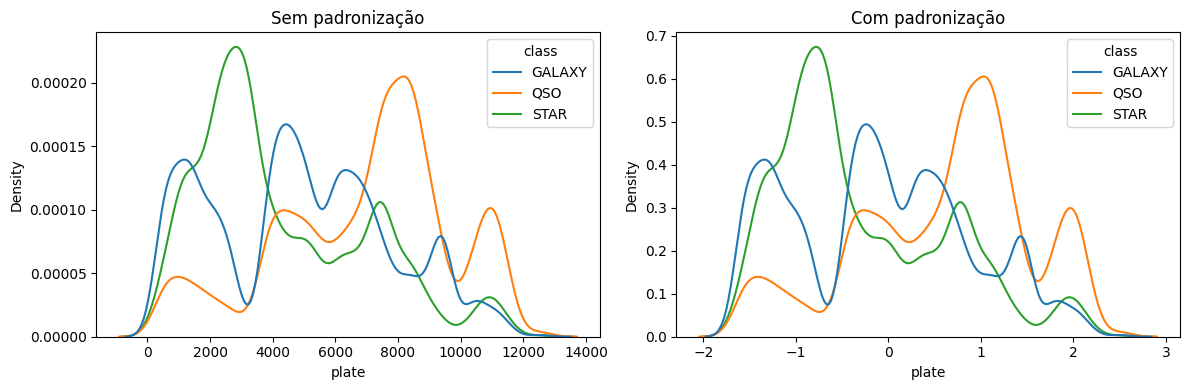

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Dados sem padronização.
sns.kdeplot(x='plate', hue='class', ax=axes[0], data=data, common_norm=False, fill=False, alpha=1)
axes[0].title.set_text('Sem padronização')
# Dados com padronização.
sns.kdeplot(x='plate', hue='class', ax=axes[1], data=df_scaled, common_norm=False, fill=False, alpha=1)
axes[1].title.set_text('Com padronização')

plt.tight_layout()
plt.show()
sns.reset_defaults()

É possível notar a mudança no comportamento das variáveis: a média tendendo a zero, o desvio padrão tendendo a um, valores mínimos e máximos mais próximos e a mudança de dimensão nos eixos dos gráficos.

### **Preparação para AM**

A seguir, é feita a preparação dos dados que de fato serão utilizados nos modelos (há a divisão entre NB e os outros algoritmos, como citado anteriormente). É feita a remoção das colunas indesejáveis, a separação entre atributos e classe e a divisão em conjunto de treino e teste. Na padronização, o fit do scaler é feito somente com a base de treino, com o fim de simular um contexto de aplicação real, onde o modelo que utiliza a transformação, faz o fit do scaler para calcular as médias e desvios padrão (nos dados já disponíveis), porém não sabe o comportamento dos dados que virão futuramente (para ser feita a classificação).

#### **Naive Bayes**

In [ ]:
# Remove colunas com ids e colunas com alta correlação.
data_NB = data.drop(['obj_ID','run_ID','cam_col','rerun_ID','field_ID','fiber_ID', 'z', 'r', 'g', 'plate', 'spec_obj_ID', 'i'], axis=1)

# Separa entre atributos (X) e classe (y).
X_NB = data_NB.drop(['class'], axis=1).to_numpy()
y_NB = data_NB['class'].to_numpy()

# Divide o dataset em treino e teste.
X_NB_train, X_NB_test, y_NB_train, y_NB_test = train_test_split(X_NB, y_NB, test_size=0.3, random_state=43)


# Normaliza os dados.
scaler = StandardScaler()
scaler.fit(X_NB_train)

X_NB_train = scaler.transform(X_NB_train)
X_NB_test = scaler.transform(X_NB_test)

#### **Outros**

In [ ]:
# Remove colunas com ids, não são características importantes para os modelos.
data_ot = data.drop(['obj_ID','run_ID','cam_col','rerun_ID','field_ID','fiber_ID'], axis=1)

# Separa entre atributos (X) e classe (y).
X = data_ot.drop(['class'], axis=1).to_numpy()
y = data_ot['class'].to_numpy()

# Divide o dataset em treino e teste.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)


# Normaliza os dados.
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## **Modelos**

A seguir, são feitos os experimentos com os algoritmos de AM pedidos, seguindo o seguinte padrão:
1. Validação cruzada, com k = 10, 12 combinações de hiperparâmetros, utilizando a base de treino.
2. Exibição dos resultados da validação cruzada.
3. Treino de um modelo com a combinação de hiperparâmetros que obteve o melhor resultado.
4. Aplicação do modelo na base de teste.

### **Validação cruzada**

A validação cruzada, basicamente divide o conjunto de dados em k partes (no caso, 10), após isso, são feitos testes utilizando a métrica escolhida em k modelos, cada um utilizando uma dessas k partes como conjunto de teste e o resto como conjunto de treino. Utilizamos a classe GridSearchCV, que ainda permite o teste de combinações de hiperparâmetros.

![image.png]( 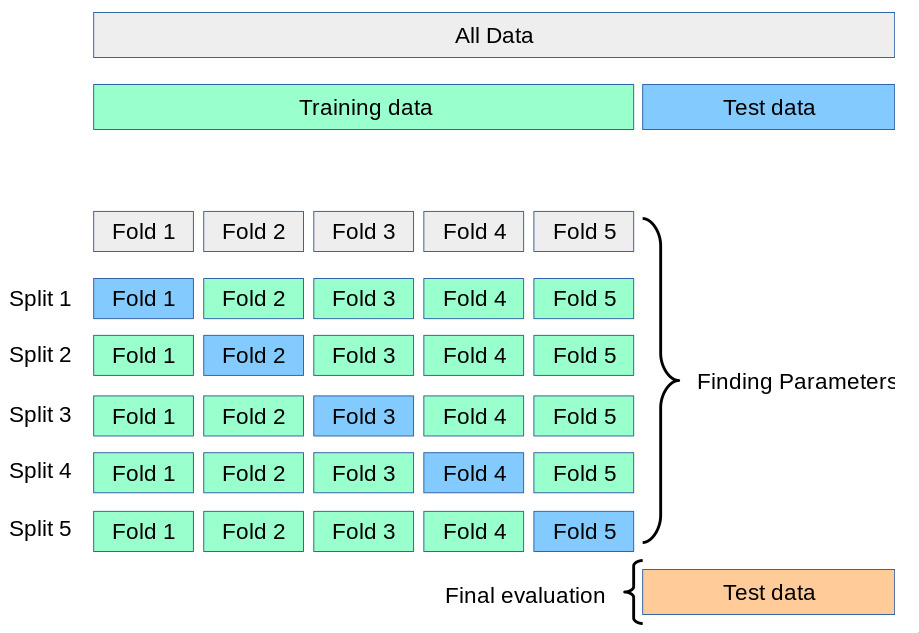)

In [ ]:
# Importa modelos e utilitários que serão utilizados.
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# Função para imprimir resultados de um modedlo
classes=['GALAXY', 'QSO', 'STAR']
def resultados(predict, predict_proba):
    # Imprime acurácia e AUC.
    print('Acurácia: ', accuracy_score(y_test, predict))
    print('AUC: ', roc_auc_score(y_test, predict_proba, multi_class='ovo'))

    # Imprime matriz de confusão.
    cm = confusion_matrix(y_test, predict, labels=classes)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classes)
    disp.plot()
    plt.show()

### **KNN**

É um algoritmo que classifica os novos dados com base na proximidade aos dados já conhecidos. A classe prevista de uma nova observação é a classe mais frequente nos k vizinhos mais próximos em relação ao novo dado.

![image.png]( 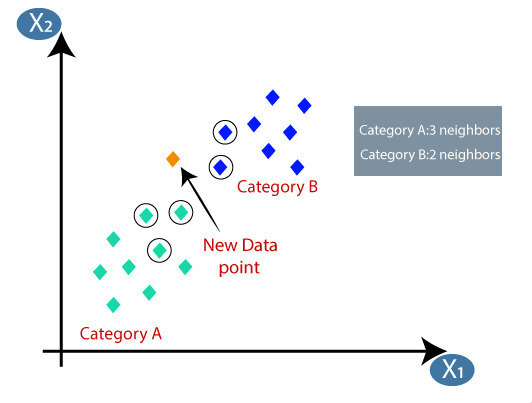)

Hiperparâmetros testados:
- n_neighbors: número de vizinhos.
- weights: peso das instâncias na classificação, pode ser *uniform* (todos vizinhos têm o mesmo peso) ou *distance* (vizinhos mais próximos têm mais peso).
- p: distância utilizada
    - p = 1: manhattan
    - p = 2: euclidiana
    - p = outro: minkowski

In [ ]:
%%time

# Faz o 10-fold cross validation para o KNN.
knn_parameters = {
    'n_neighbors' : [3, 7, 13],
    'weights' : ['uniform', 'distance'],
    'p': [2, 3]
}

knn_gs = GridSearchCV(KNeighborsClassifier(), knn_parameters, cv=10, scoring='roc_auc_ovo')
knn_gs.fit(X_train, y_train);

CPU times: user 1min 38s, sys: 20.3 ms, total: 1min 38s
Wall time: 1min 38s


In [ ]:
# Mostra resultados do GridSearchCV
results_knn_gs = pd.DataFrame(knn_gs.cv_results_)
view = ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']
results_knn_gs[view].sort_values(by='rank_test_score')

params  mean_test_score  \
9   {'n_neighbors': 13, 'p': 2, 'weights': 'distan...         0.979667   
11  {'n_neighbors': 13, 'p': 3, 'weights': 'distan...         0.979117   
8   {'n_neighbors': 13, 'p': 2, 'weights': 'uniform'}         0.978784   
10  {'n_neighbors': 13, 'p': 3, 'weights': 'uniform'}         0.978230   
5   {'n_neighbors': 7, 'p': 2, 'weights': 'distance'}         0.976472   
4    {'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}         0.975890   
7   {'n_neighbors': 7, 'p': 3, 'weights': 'distance'}         0.975650   
6    {'n_neighbors': 7, 'p': 3, 'weights': 'uniform'}         0.975069   
1   {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}         0.968097   
0    {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}         0.967790   
3   {'n_neighbors': 3, 'p': 3, 'weights': 'distance'}         0.966796   
2    {'n_neighbors': 3, 'p': 3, 'weights': 'uniform'}         0.966474   

    std_test_score  rank_test_score  
9         0.001636                1  
11        0.001749                2  
8         0.001688                3  
10        0.001840                4  
5         0.001829                5  
4         0.001849                6  
7         0.001460                7  
6         0.001476                8  
1         0.002422                9  
0         0.002434               10  
3         0.002199               11  
2         0.002210               12

In [ ]:
%%time

# Treina um modelo com a combinação de hiperparâmetros mais bem colocada.
knn = KNeighborsClassifier(n_neighbors=13, p=2, weights='distance')
knn.fit(X_train, y_train);

CPU times: user 162 ms, sys: 3.1 ms, total: 165 ms
Wall time: 165 ms


In [ ]:
%%time
# Testa o modelo na base de testes.
resultados_knn = {'predict': knn.predict(X_test), 'predict_proba': knn.predict_proba(X_test)}

CPU times: user 3.2 s, sys: 10.3 ms, total: 3.21 s
Wall time: 3.22 s


Acurácia:  0.9404
AUC:  0.9816283959938353


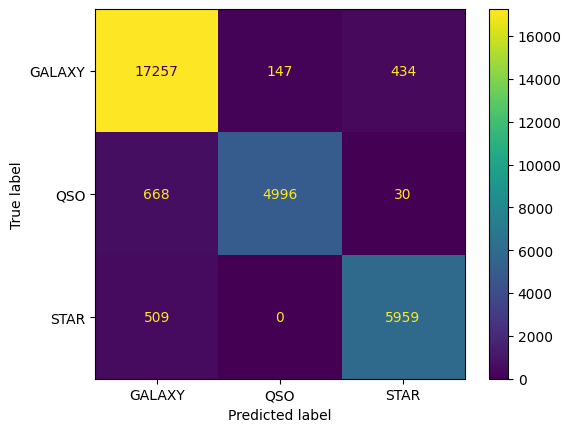

In [ ]:
# Imprime os resultados.
resultados(resultados_knn['predict'], resultados_knn['predict_proba'])

### **Árvore de Decisão**

Utiliza uma árvore para fazer a classificação, cada nó interno representa um atributo, cada ramo um possível valor para esse atributo e os nós folha representam as classes. Dado uma nova observação, é feita a travessia na árvore para encontrar a classe prevista.

![image.jpg]( 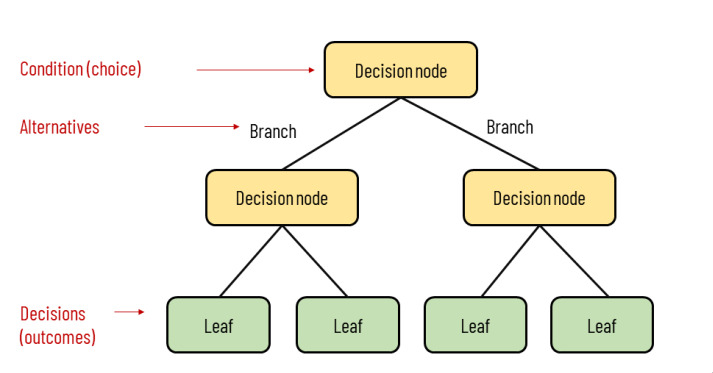)

Hiperparâmetros testados:
- criterion: função para medir a qualidade de um split (gini, entropy ou log_loss).
- splitter: estratégia para escolher o split de um nó (best ou random).
- max_features: função aplicada no número total de características para obter o número máximo de características utilizadas ao buscar o melhor split (sqrt, log2).

In [ ]:
%%time

# Faz o 10-fold cross validation para a Árvore de Decisão.
dt_parameters = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'splitter' : ['best', 'random'],
    'max_features': ['sqrt', 'log2'],
    'random_state': [42]
}

dt_gs = GridSearchCV(DecisionTreeClassifier(), dt_parameters, cv=10, scoring='roc_auc_ovo')
dt_gs.fit(X_train, y_train);

CPU times: user 25.2 s, sys: 23.4 ms, total: 25.2 s
Wall time: 25.2 s


In [ ]:
# Mostra resultados do GridSearchCV
pd.set_option('display.max_colwidth', None)
results_dt_gs = pd.DataFrame(dt_gs.cv_results_)
view = ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']
results_dt_gs[view].sort_values(by='rank_test_score')

params  \
4      {'criterion': 'entropy', 'max_features': 'sqrt', 'random_state': 42, 'splitter': 'best'}   
6      {'criterion': 'entropy', 'max_features': 'log2', 'random_state': 42, 'splitter': 'best'}   
8     {'criterion': 'log_loss', 'max_features': 'sqrt', 'random_state': 42, 'splitter': 'best'}   
10    {'criterion': 'log_loss', 'max_features': 'log2', 'random_state': 42, 'splitter': 'best'}   
0         {'criterion': 'gini', 'max_features': 'sqrt', 'random_state': 42, 'splitter': 'best'}   
2         {'criterion': 'gini', 'max_features': 'log2', 'random_state': 42, 'splitter': 'best'}   
5    {'criterion': 'entropy', 'max_features': 'sqrt', 'random_state': 42, 'splitter': 'random'}   
7    {'criterion': 'entropy', 'max_features': 'log2', 'random_state': 42, 'splitter': 'random'}   
9   {'criterion': 'log_loss', 'max_features': 'sqrt', 'random_state': 42, 'splitter': 'random'}   
11  {'criterion': 'log_loss', 'max_features': 'log2', 'random_state': 42, 'splitter': 'random'}   
1       {'criterion': 'gini', 'max_features': 'sqrt', 'random_state': 42, 'splitter': 'random'}   
3       {'criterion': 'gini', 'max_features': 'log2', 'random_state': 42, 'splitter': 'random'}   

    mean_test_score  std_test_score  rank_test_score  
4          0.963537        0.003653                1  
6          0.963537        0.003653                1  
8          0.963537        0.003653                1  
10         0.963537        0.003653                1  
0          0.962449        0.004010                5  
2          0.962449        0.004010                5  
5          0.948995        0.004641                7  
7          0.948995        0.004641                7  
9          0.948995        0.004641                7  
11         0.948995        0.004641                7  
1          0.948541        0.006158               11  
3          0.948541        0.006158               11

In [ ]:
%%time

# Treina um modelo com a combinação de hiperparâmetros mais bem colocada.
dt = DecisionTreeClassifier(criterion='entropy', splitter='best', max_features='sqrt', random_state=42)
dt.fit(X_train, y_train);

CPU times: user 367 ms, sys: 2.43 ms, total: 370 ms
Wall time: 369 ms


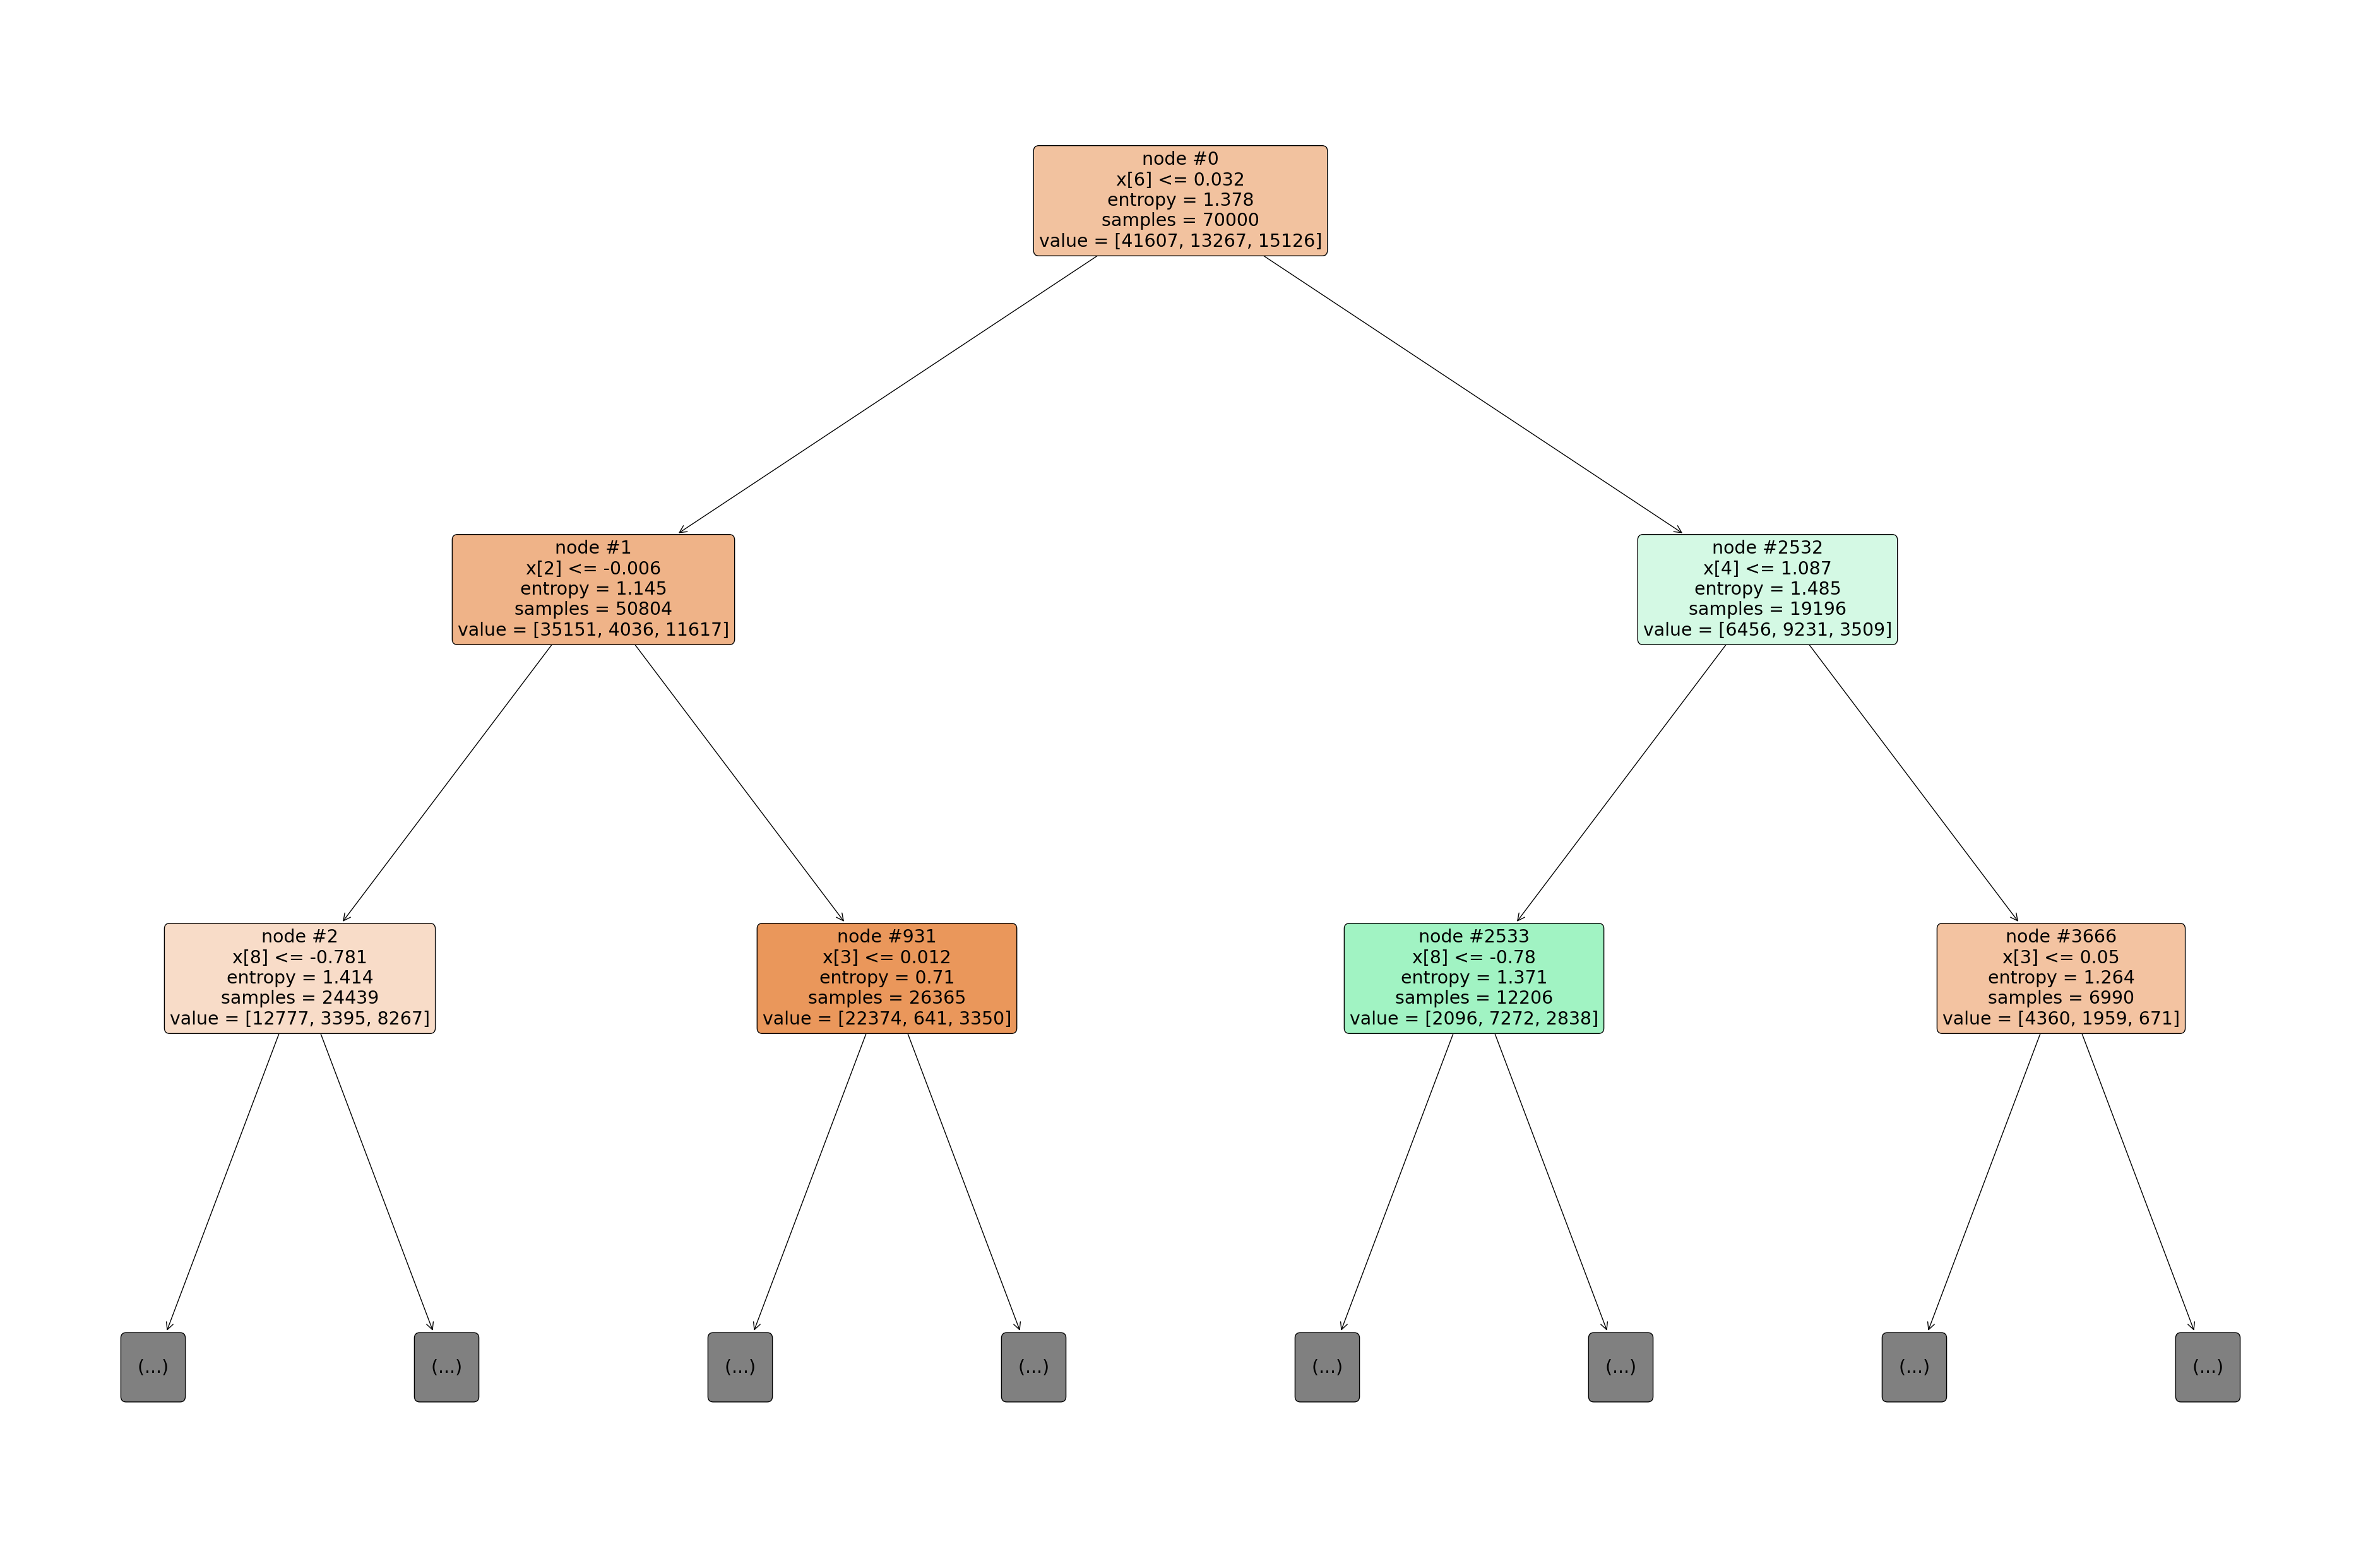

In [ ]:
from sklearn.tree import plot_tree

# Imprime um pedaço da árvore
plt.figure(figsize=(48, 32))
plot_tree(dt, filled=True, rounded=True, max_depth=2, node_ids=True)
plt.show()

In [ ]:
%%time

# Testa o modelo na base de testes.
resultados_dt = {'predict': dt.predict(X_test), 'predict_proba': dt.predict_proba(X_test)}

CPU times: user 8.49 ms, sys: 470 µs, total: 8.96 ms
Wall time: 8.37 ms


Acurácia:  0.9574666666666667
AUC:  0.9635747893644057


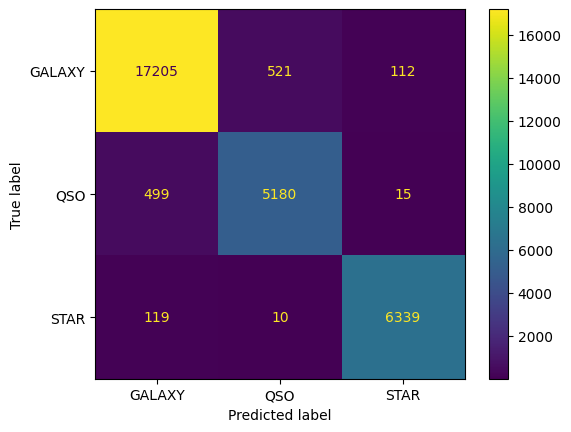

In [ ]:
# Imprime os resultados.
resultados(resultados_dt['predict'], resultados_dt['predict_proba'])

### **Multilayer Perceptron**

Rede neural artificial, possui camada de entrada, camadas escondidas e camada de saída. Cada neurônio é conectado com todos os neurônios da camada seguinte através de um peso. Aprendizado consiste em otimizar esses pesos (e bias) para encontrar padrões nos dados e obter uma classe prevista na camada de saída.

![image.png]( 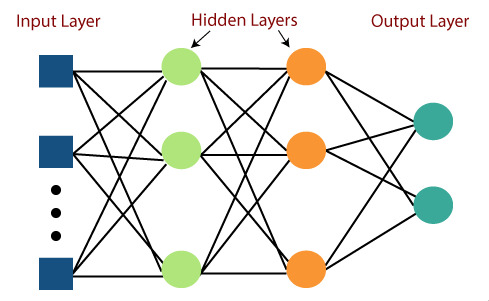)

Hiperparâmetros testados:
- hidden_layer_sizes: arquitetura das camadas escondidas.
- activation: função de ativação utilizada nas camadas escondidas (relu, tanh ou logistic(sigmoid)).

In [ ]:
%%time

# Esconde warning de convergência.
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Faz o 10-fold cross validation para o Multilayer Perceptron.
mlp_parameters = {
    'hidden_layer_sizes' : [(8), (15), (5, 3), (10, 5)],
    'activation': ['relu', 'logistic', 'tanh'],
    'max_iter': [50], # para não demorar tanto.
    'random_state': [42]
}

mlp_gs = GridSearchCV(MLPClassifier(), mlp_parameters, cv=10, scoring='roc_auc_ovo')
mlp_gs.fit(X_train, y_train);

CPU times: user 9min 12s, sys: 1min 42s, total: 10min 55s
Wall time: 8min 59s


In [ ]:
# Mostra resultados do GridSearchCV
pd.set_option('display.max_colwidth', None)
results_mlp_gs = pd.DataFrame(mlp_gs.cv_results_)
view = ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']
results_mlp_gs[view].sort_values(by='rank_test_score')

params  \
11      {'activation': 'tanh', 'hidden_layer_sizes': (10, 5), 'max_iter': 50, 'random_state': 42}   
9            {'activation': 'tanh', 'hidden_layer_sizes': 15, 'max_iter': 50, 'random_state': 42}   
1            {'activation': 'relu', 'hidden_layer_sizes': 15, 'max_iter': 50, 'random_state': 42}   
8             {'activation': 'tanh', 'hidden_layer_sizes': 8, 'max_iter': 50, 'random_state': 42}   
10       {'activation': 'tanh', 'hidden_layer_sizes': (5, 3), 'max_iter': 50, 'random_state': 42}   
2        {'activation': 'relu', 'hidden_layer_sizes': (5, 3), 'max_iter': 50, 'random_state': 42}   
7   {'activation': 'logistic', 'hidden_layer_sizes': (10, 5), 'max_iter': 50, 'random_state': 42}   
3       {'activation': 'relu', 'hidden_layer_sizes': (10, 5), 'max_iter': 50, 'random_state': 42}   
5        {'activation': 'logistic', 'hidden_layer_sizes': 15, 'max_iter': 50, 'random_state': 42}   
0             {'activation': 'relu', 'hidden_layer_sizes': 8, 'max_iter': 50, 'random_state': 42}   
4         {'activation': 'logistic', 'hidden_layer_sizes': 8, 'max_iter': 50, 'random_state': 42}   
6    {'activation': 'logistic', 'hidden_layer_sizes': (5, 3), 'max_iter': 50, 'random_state': 42}   

    mean_test_score  std_test_score  rank_test_score  
11         0.993782        0.000935                1  
9          0.993156        0.000947                2  
1          0.992966        0.001010                3  
8          0.992957        0.001000                4  
10         0.992563        0.001096                5  
2          0.992486        0.001193                6  
7          0.992445        0.001104                7  
3          0.992369        0.001164                8  
5          0.992148        0.001113                9  
0          0.991737        0.000953               10  
4          0.991455        0.001121               11  
6          0.989400        0.000979               12

In [ ]:
%%time

# Treina um modelo com a combinação de hiperparâmetros mais bem colocada.
mlp = MLPClassifier(hidden_layer_sizes=[10, 5], activation='tanh', random_state=42, max_iter=1000)
mlp.fit(X_train, y_train);

CPU times: user 16.5 s, sys: 14.8 ms, total: 16.5 s
Wall time: 16.6 s


In [ ]:
%%time

# Testa o modelo na base de testes.
resultados_mlp = {'predict': mlp.predict(X_test), 'predict_proba': mlp.predict_proba(X_test)}

CPU times: user 57.2 ms, sys: 181 ms, total: 238 ms
Wall time: 24.9 ms


Acurácia:  0.9728666666666667
AUC:  0.9948700755373316


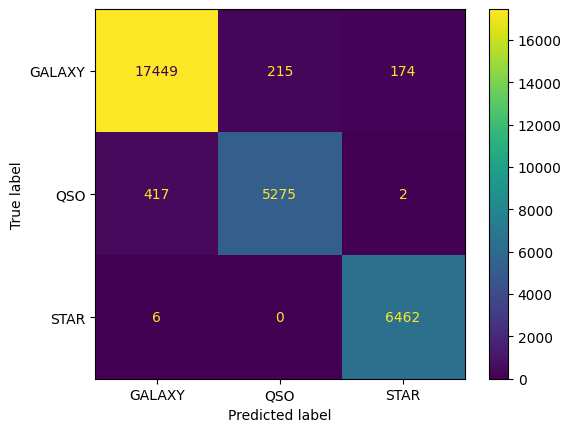

In [ ]:
# Imprime os resultados.
resultados(resultados_mlp['predict'], resultados_mlp['predict_proba'])

### **Naive Bayes**

Baseia-se no teorema de Bayes para fazer as previsões de forma probabilística. O "naive" vem de sua suposição de que os atributos são independentes entre si. A classe prevista é a que possui a maior possibilidade posteriori, dada a observação. Foi utilizada a classe GaussianNB, que assume que a verossimilhança das características é Gaussiana.

![image.png]( 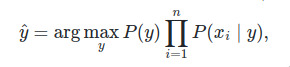)

![image.png]( 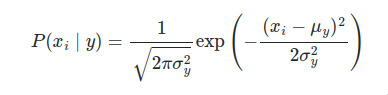)

Hiperparâmetros testados:
- priors: probabilidades a priori das classes (se for igual a None, são calculadas de acordo com os dados).
- var_smoothing: parte da maior variância de todos os atributos que é adicionada às variâncias para estabilidade de cálculo.

In [ ]:
%%time

# Faz o 10-fold cross validation para o Naive Bayes.
gnb_parameters = {
    'priors': [None, [0.6, 0.2, 0.2]], # testando com as probabilidades parecidas com a distribuição de classes.
    'var_smoothing': [1e-11, 1e-10, 1e-9, 1e-8, 1e-7, 1e-6]
}

gnb_gs = GridSearchCV(GaussianNB(), gnb_parameters, cv=10, scoring='roc_auc_ovo')
gnb_gs.fit(X_NB_train, y_NB_train);

CPU times: user 8.37 s, sys: 31.4 ms, total: 8.4 s
Wall time: 8.38 s


In [ ]:
# Mostra resultados do GridSearchCV
pd.set_option('display.max_colwidth', None)
results_gnb_gs = pd.DataFrame(gnb_gs.cv_results_)
view = ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']
results_gnb_gs[view].sort_values(by='rank_test_score')

params  mean_test_score  \
5              {'priors': None, 'var_smoothing': 1e-06}         0.980960   
4              {'priors': None, 'var_smoothing': 1e-07}         0.980853   
11  {'priors': [0.6, 0.2, 0.2], 'var_smoothing': 1e-06}         0.980846   
3              {'priors': None, 'var_smoothing': 1e-08}         0.980773   
10  {'priors': [0.6, 0.2, 0.2], 'var_smoothing': 1e-07}         0.980764   
2              {'priors': None, 'var_smoothing': 1e-09}         0.980762   
1              {'priors': None, 'var_smoothing': 1e-10}         0.980760   
0              {'priors': None, 'var_smoothing': 1e-11}         0.980760   
9   {'priors': [0.6, 0.2, 0.2], 'var_smoothing': 1e-08}         0.980685   
8   {'priors': [0.6, 0.2, 0.2], 'var_smoothing': 1e-09}         0.980673   
7   {'priors': [0.6, 0.2, 0.2], 'var_smoothing': 1e-10}         0.980672   
6   {'priors': [0.6, 0.2, 0.2], 'var_smoothing': 1e-11}         0.980672   

    std_test_score  rank_test_score  
5         0.001074                1  
4         0.001013                2  
11        0.001097                3  
3         0.001014                4  
10        0.001030                5  
2         0.001015                6  
1         0.001015                7  
0         0.001015                8  
9         0.001030                9  
8         0.001031               10  
7         0.001031               11  
6         0.001031               12

In [ ]:
%%time

# Treina um modelo com a combinação de hiperparâmetros mais bem colocada.
gnb = GaussianNB(priors=None, var_smoothing=1e-06)
gnb.fit(X_NB_train, y_NB_train);

CPU times: user 63.9 ms, sys: 106 µs, total: 64 ms
Wall time: 63.9 ms


In [ ]:
%%time

# Testa o modelo na base de testes.
resultados_mlp = {'predict': gnb.predict(X_NB_test), 'predict_proba': gnb.predict_proba(X_NB_test)}

CPU times: user 7.6 ms, sys: 2.89 ms, total: 10.5 ms
Wall time: 10.4 ms


Acurácia:  0.9464666666666667
AUC:  0.9812264092705466


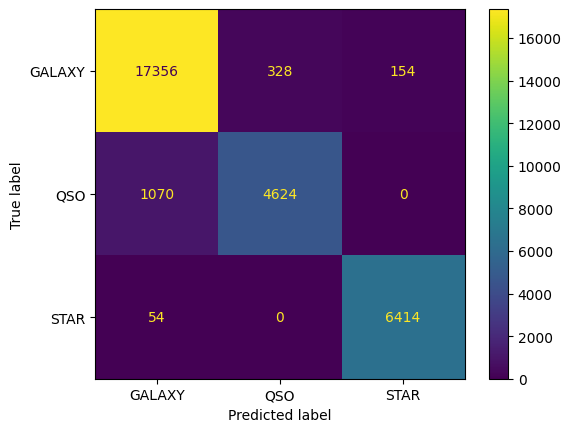

In [ ]:
# Imprime os resultados.
resultados(resultados_mlp['predict'], resultados_mlp['predict_proba'])

## **Resultados**

In [ ]:
resultados = DataFrame()

# Tempo em segundos. Os dados estão hardcoded, retirados das células com %%time, portanto pode haver uma pequena variação.

# Nome do modelo.
resultados['Modelo'] = ['KNN', 'Árvore de Decisão', 'MLP', 'Naive Bayes']

# Tempo para realizar a validação cruzada.
resultados['Tempo GridSearchCV'] = [82, 23.5, 519, 8.19]

# Tempo de treino do modelo com os melhores hiperparâmetros.
resultados['Tempo de Treino (MM)'] = [0.133, 0.384, 15.9, 0.063]

# Tempo que o modelo com os melhores hiperparâmetros levou para fazer a previsão da base de teste.
resultados['Tempo de Previsão (MM)'] = [2.86, 0.007, 0.025, 0.011]

# Pontuação média do melhor modelo na validação cruzada (AUC).
resultados['Média Score (MM)'] = [0.980, 0.964, 0.994, 0.981]

# AUC do melhor modelo na base de teste.
resultados['AUC (MM)'] = [0.982, 0.964, 0.995, 0.981]

# Acurácia do melhor modelo na base de teste.
resultados['Acurácia (MM)'] = [0.940, 0.957, 0.973, 0.946]

In [ ]:
display(resultados)

Modelo  Tempo GridSearchCV  Tempo de Treino (MM)  \
0                KNN               82.00                 0.133   
1  Árvore de Decisão               23.50                 0.384   
2                MLP              519.00                15.900   
3        Naive Bayes                8.19                 0.063   

   Tempo de Previsão (MM)  Média Score (MM)  AUC (MM)  Acurácia (MM)  
0                   2.860             0.980     0.982          0.940  
1                   0.007             0.964     0.964          0.957  
2                   0.025             0.994     0.995          0.973  
3                   0.011             0.981     0.981          0.946

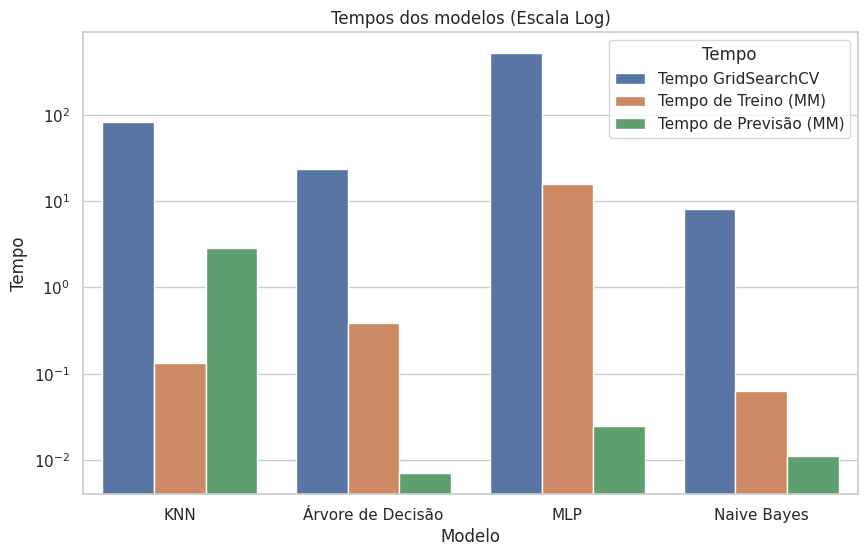

In [ ]:
# Prepara a tabela.
melted_resultados = pd.melt(
    resultados,
    id_vars='Modelo',
    value_vars=['Tempo GridSearchCV', 'Tempo de Treino (MM)', 'Tempo de Previsão (MM)'],
    var_name='Tempo',
    value_name='Tempo (s)'
)

# Estilo do plot.
sns.set(style='whitegrid')
sns.set_context('notebook')

# Plota o gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x='Modelo', y='Tempo (s)', hue='Tempo', data=melted_resultados)
plt.title('Tempos dos modelos (Escala Log)')
plt.xlabel('Modelo')
plt.ylabel('Tempo')

# Escala logarítimica para possibilitar a visualização (valores muito distantes).
plt.yscale('log')

plt.show()


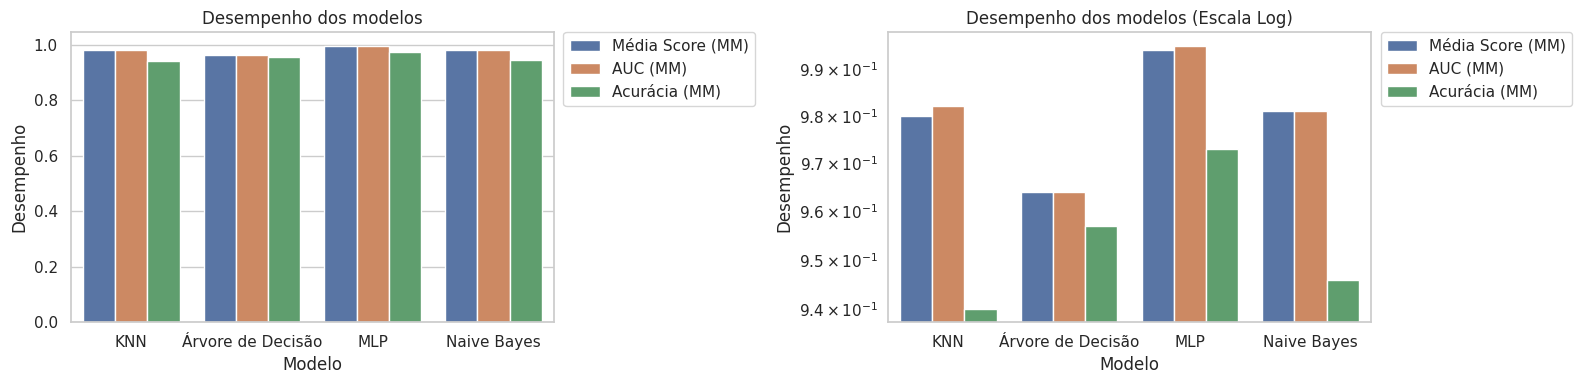

In [ ]:
# Prepara a tabela.
melted_resultados = pd.melt(
    resultados,
    id_vars='Modelo',
    value_vars=['Média Score (MM)',	'AUC (MM)', 'Acurácia (MM)'],
    var_name='Métrica',
    value_name='Desempenho'
)

# Estilo do plot.
sns.set(style='whitegrid')
sns.set_context('notebook')

# Cria a figura e os subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 4))

# Primeiro subplot sem escala de log
sns.barplot(x='Modelo', y='Desempenho', hue='Métrica', data=melted_resultados, ax=axs[1])
axs[0].set_title('Desempenho dos modelos')
axs[0].set_xlabel('Modelo')
axs[0].set_ylabel('Desempenho')

# Segundo subplot com escala de log (valores muito próximos)
axs[1].set_yscale('log')
sns.barplot(x='Modelo', y='Desempenho', hue='Métrica', data=melted_resultados, ax=axs[0])
axs[1].set_title('Desempenho dos modelos (Escala Log)')
axs[1].set_xlabel('Modelo')
axs[1].set_ylabel('Desempenho')

# Ajusta a legenda.
axs[0].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)
axs[1].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)

# Ajusta o espaçamento entre os subplots
plt.tight_layout()

plt.show()
sns.reset_defaults()

## **Conclusão**

A partir dos resultados obtidos, é possível fazer algumas conclusões:
- No geral, todos os modelos obtiveram um bom desempenho (todas as métricas, em todos modelos, sempre foram maior que 0.90).
- O modelo MLP, obteve os melhores resultados em termos de desempenho, maior média de pontuação na validação cruzada, maior acurácia e AUC na base de teste.
- O treino do MLP é bem custoso.
- O KNN é o único modelo em que o tempo para realizar a classificação é maior do que o tempo do treinamento. Isso porque o treinamento é basicamente decorar os dados (rápido) e a classificação precisa calcular várias distâncias (demorado).
- No quesito tempo, o algoritmo Naive Bayes foi o que obteve o melhor resultado, só ficando atrás da árvore decisão no tempo de previsão.
- De um modo geral, a Árvore de Decisão obteve o pior desempenho, somente na acurácia, esse algoritmo ficou a frente do KNN e do Naive Bayes.

## **Referências Bibliográficas**
SDSS17, Stellar Classification Dataset. **Kaggle**. Disponível em: < https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17?datasetId=1866141&sortBy=voteCount >. Acesso em 15 de junho de 2023.

GALÁXIA. **Wikipedia**. Disponível em: < https://pt.wikipedia.org/wiki/Gal%C3%A1xia >. Acesso em 20 de junho de 2023.

ESTRELA. **Wikipedia**. Disponível em: < https://pt.wikipedia.org/wiki/Estrela >. Acesso em 20 de junho de 2023.

QUASAR. **Wikipedia**. Disponível em: < https://pt.wikipedia.org/wiki/Quasar >. Acesso em 20 de junho de 2023.

**SDSS**. Disponível em: < https://www.sdss.org >. Acesso em 20 de junho de 2023.